# Computational Social Science Project #3 

**Enter your Name:**_____Jonathan Landeros-Cisneros_______

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

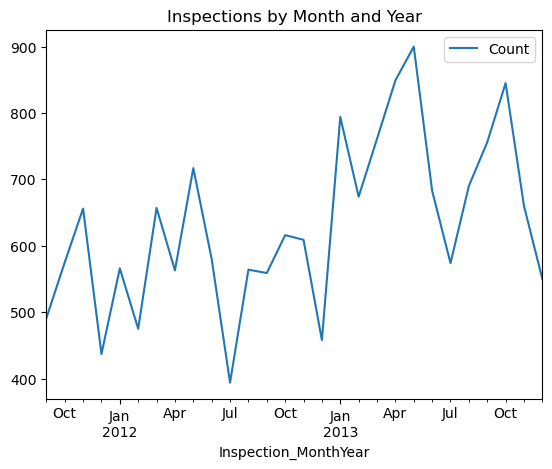

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

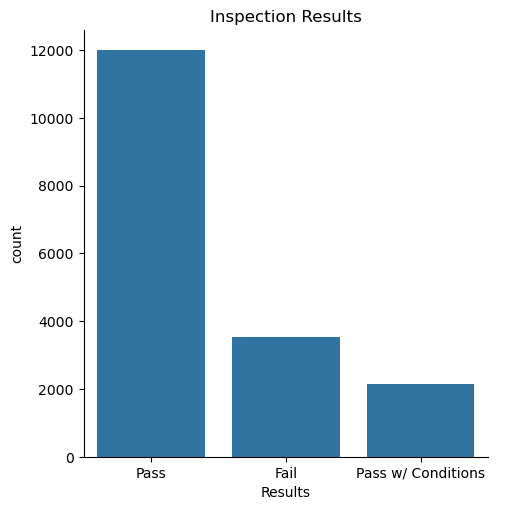

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

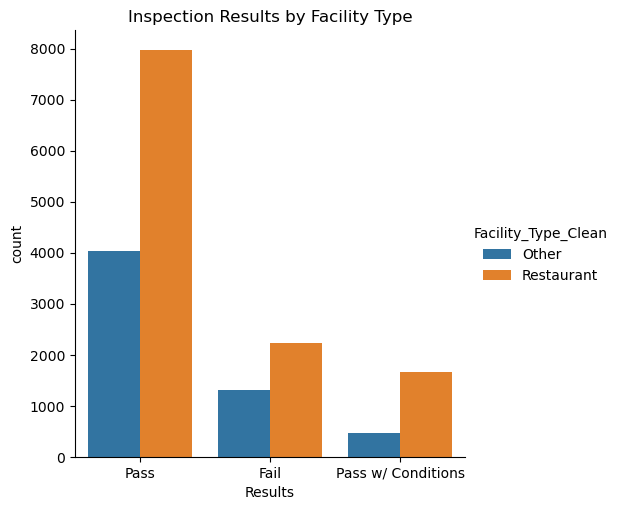

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1 Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV



In [14]:
param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l2']
}
lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X, y)
best_lr = grid_search.best_estimator_

###  Model 2 Random Forest Classifier

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)
best_rf = grid_search.best_estimator_



### Model 3 AdaBoost

In [16]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME']
}
ada = AdaBoostClassifier()
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X, y)
best_ada = grid_search.best_estimator_



### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.


Recall is the most important metric in this predictive auditing context because it measures the model's ability to correctly identify all the pass cases (true positives). Missing any pass cases could lead to significant issues, so having a high recall is crucial.

The F1-Score is the next most important metric as it provides a balanced measure of both precision and recall. This is valuable because we want the model to not only identify all the pass cases (high recall), but also minimize false positives (high precision).

In [17]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", cross_val_score(best_lr, X, y, cv=5, scoring='accuracy').mean())
print("Precision:", cross_val_score(best_lr, X, y, cv=5, scoring='precision').mean()) 
print("Recall:", cross_val_score(best_lr, X, y, cv=5, scoring='recall').mean())
print("F1-Score:", cross_val_score(best_lr, X, y, cv=5, scoring='f1').mean())

# Random Forest
print("\nRandom Forest:")
print("Accuracy:", cross_val_score(best_rf, X, y, cv=5, scoring='accuracy').mean())
print("Precision:", cross_val_score(best_rf, X, y, cv=5, scoring='precision').mean())
print("Recall:", cross_val_score(best_rf, X, y, cv=5, scoring='recall').mean()) 
print("F1-Score:", cross_val_score(best_rf, X, y, cv=5, scoring='f1').mean())

# AdaBoost
print("\nAdaBoost:")
print("Accuracy:", cross_val_score(best_ada, X, y, cv=5, scoring='accuracy').mean())
print("Precision:", cross_val_score(best_ada, X, y, cv=5, scoring='precision').mean())
print("Recall:", cross_val_score(best_ada, X, y, cv=5, scoring='recall').mean())
print("F1-Score:", cross_val_score(best_ada, X, y, cv=5, scoring='f1').mean())

Logistic Regression:
Accuracy: 0.9179020452918497
Precision: 0.7686621568095171
Recall: 0.8545839824183202
F1-Score: 0.8073556662519715

Random Forest:
Accuracy: 0.925478430000258
Precision: 0.7684224831858231
Recall: 0.8970087016726724
F1-Score: 0.8291741763372583

AdaBoost:
Accuracy: 0.9218861986675204
Precision: 0.7359607860700776
Recall: 0.9565975882886709
F1-Score: 0.8315568279494038


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

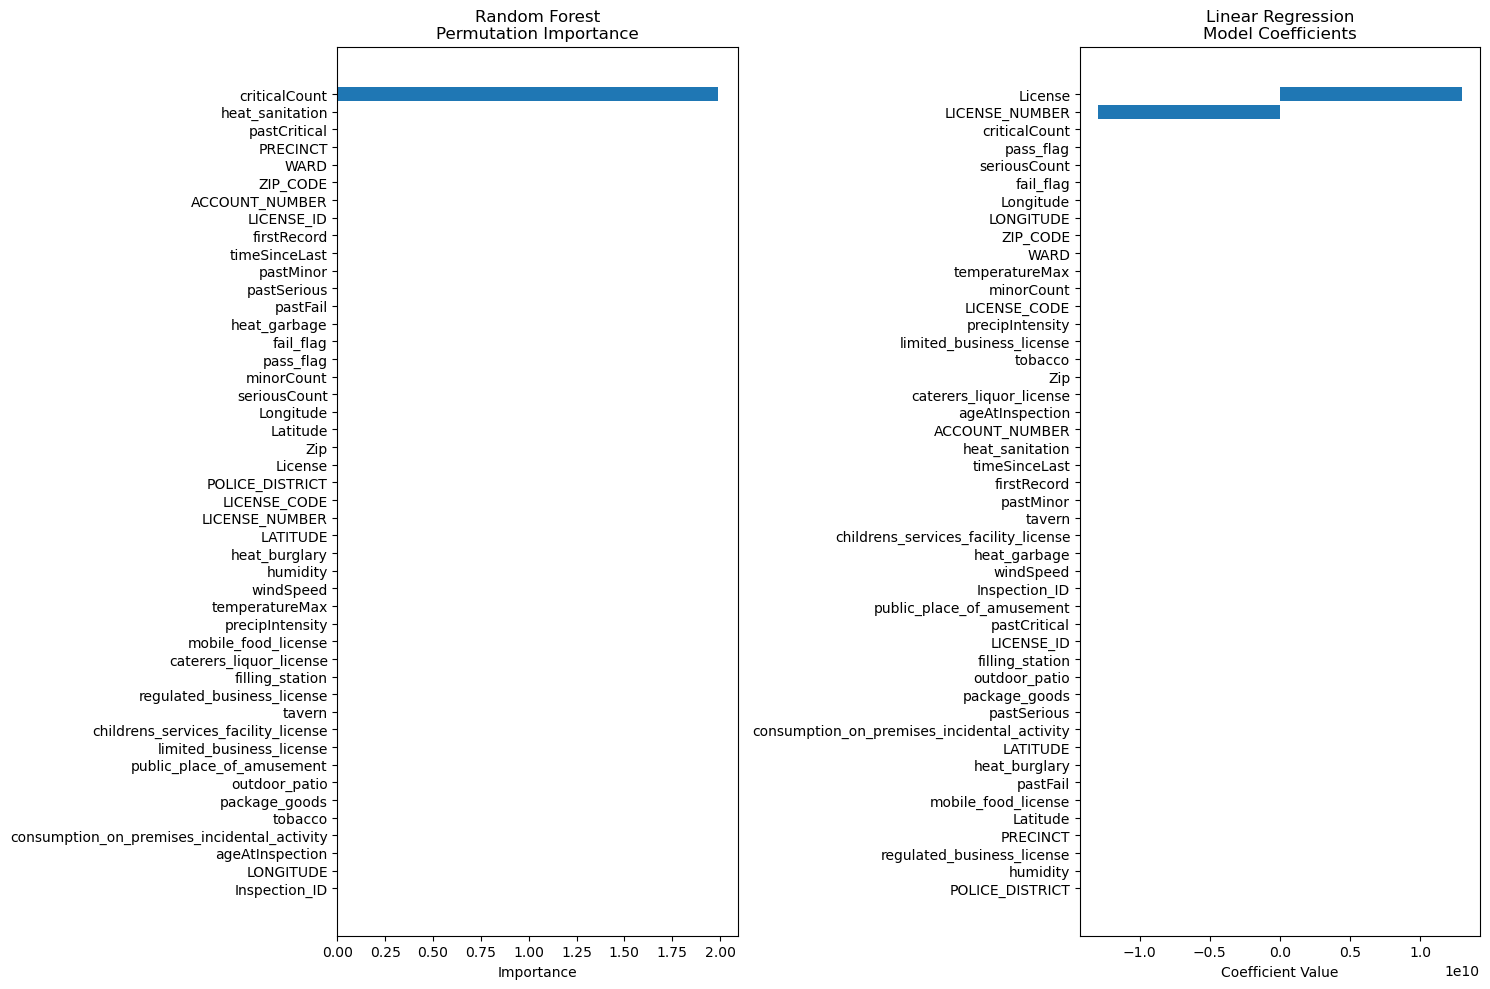

Random Forest Permutation Importance:
Inspection_ID: 0.0000 ± 0.0000
LONGITUDE: 0.0000 ± 0.0000
ageAtInspection: 0.0000 ± 0.0000
consumption_on_premises_incidental_activity: 0.0000 ± 0.0000
tobacco: 0.0000 ± 0.0000
package_goods: 0.0000 ± 0.0000
outdoor_patio: 0.0000 ± 0.0000
public_place_of_amusement: 0.0000 ± 0.0000
limited_business_license: 0.0000 ± 0.0000
childrens_services_facility_license: 0.0000 ± 0.0000
tavern: 0.0000 ± 0.0000
regulated_business_license: 0.0000 ± 0.0000
filling_station: 0.0000 ± 0.0000
caterers_liquor_license: 0.0000 ± 0.0000
mobile_food_license: 0.0000 ± 0.0000
precipIntensity: 0.0000 ± 0.0000
temperatureMax: 0.0000 ± 0.0000
windSpeed: 0.0000 ± 0.0000
humidity: 0.0000 ± 0.0000
heat_burglary: 0.0000 ± 0.0000
LATITUDE: 0.0000 ± 0.0000
LICENSE_NUMBER: 0.0000 ± 0.0000
LICENSE_CODE: 0.0000 ± 0.0000
POLICE_DISTRICT: 0.0000 ± 0.0000
License: 0.0000 ± 0.0000
Zip: 0.0000 ± 0.0000
Latitude: 0.0000 ± 0.0000
Longitude: 0.0000 ± 0.0000
seriousCount: 0.0000 ± 0.0000
minorCo

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

# Load the dataset with low_memory=False to handle mixed types
data = pd.read_csv("data/Chicago Inspections 2011-2013.csv", low_memory=False)

# Identify numeric columns more robustly
def is_numeric_column(col):
    try:
        pd.to_numeric(data[col], errors='raise')
        return True
    except:
        return False

# Select truly numeric columns
numeric_columns = [col for col in data.columns if is_numeric_column(col)]
data_numeric = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
data_numeric = data_numeric.dropna()

# Prepare features and target
# Choose a numeric target column (you may need to adjust based on your data)
target_column = 'RISK' if 'RISK' in data_numeric.columns else data_numeric.columns[-1]
X = data_numeric.drop(target_column, axis=1)
y = data_numeric[target_column]

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Random Forest Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Permutation Importance for Random Forest
rf_perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# 2. Linear Regression Coefficient Plot
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Visualization
plt.figure(figsize=(15, 10))

# Random Forest Feature Importance
plt.subplot(1, 2, 1)
sorted_idx = rf_perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], rf_perm_importance.importances_mean[sorted_idx])
plt.title('Random Forest\nPermutation Importance')
plt.xlabel('Importance')

# Linear Regression Coefficients
plt.subplot(1, 2, 2)
coef_sorted_idx = np.argsort(np.abs(lr_model.coef_))
plt.barh(X.columns[coef_sorted_idx], lr_model.coef_[coef_sorted_idx])
plt.title('Linear Regression\nModel Coefficients')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Print out detailed feature importance
print("Random Forest Permutation Importance:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {rf_perm_importance.importances_mean[i]:.4f} ± {rf_perm_importance.importances_std[i]:.4f}")

print("\nLinear Regression Coefficients:")
for i in coef_sorted_idx:
    print(f"{X.columns[i]}: {lr_model.coef_[i]:.4f}")


Text(0.5, 1.0, 'Linear Regression Coefficients')

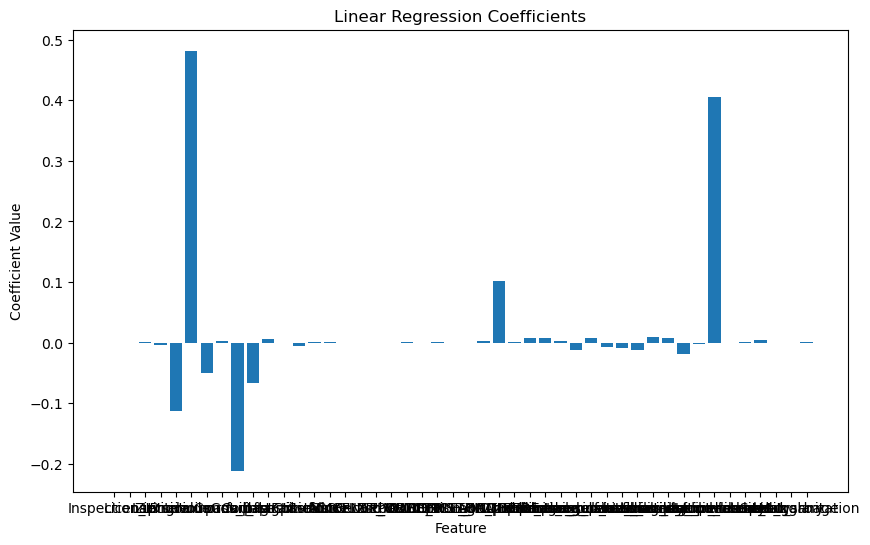

In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a coefficient plot
coeffs = model.coef_
feature_names = X.columns

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_names, coeffs)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient Value")
ax.set_title("Linear Regression Coefficients")

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Chicago Inspections dataset
data = pd.read_csv("data/Chicago Inspections 2011-2013.csv", low_memory=False)

# Select potential numeric and categorical features
numeric_features = ['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast', 'ageAtInspection']
categorical_features = ['Facility_Type_Clean', 'Inspection_Type', 'Results']

# Prepare the data
X = data[numeric_features + categorical_features].copy()

# Encode categorical features
le = LabelEncoder()
for col in categorical_features:
    X[col] = le.fit_transform(X[col].astype(str))

# Create binary target (using pass/fail flag)
y = data['pass_flag']

# Handle missing values
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get probability predictions
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importances.head(10))

# Optional: Model performance
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test_scaled)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

Top 10 Most Important Features:
                feature  importance
1          seriousCount    0.451560
11              Results    0.356001
0         criticalCount    0.169056
2            minorCount    0.013394
8       ageAtInspection    0.003296
7         timeSinceLast    0.002417
6             pastMinor    0.001541
5           pastSerious    0.000936
4          pastCritical    0.000849
9   Facility_Type_Clean    0.000570

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1156
           1       1.00      1.00      1.00      2380

    accuracy                           1.00      3536
   macro avg       1.00      1.00      1.00      3536
weighted avg       1.00      1.00      1.00      3536




Top 10 Most Likely to Fail Audits:
    Facility_Type  Fail_Probability
827    Restaurant               1.0
819         Other               1.0
812         Other               1.0
322         Other               1.0
321    Restaurant               1.0
813         Other               1.0
814         Other               1.0
317         Other               1.0
816         Other               1.0
315    Restaurant               1.0


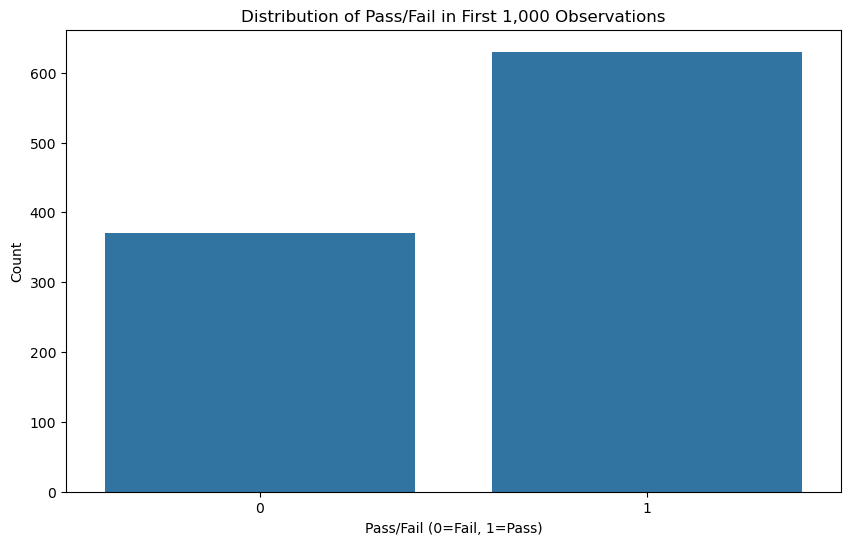

In [40]:
# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate fail probabilities for first 1,000 observations
first_1000 = X.head(1000)
first_1000_scaled = first_1000.copy()
first_1000_scaled[numeric_features] = scaler.transform(first_1000[numeric_features])
fail_probabilities = model.predict_proba(first_1000_scaled)[:, 0]  # Probability of fail

# Create DataFrame with probabilities
audit_probs = pd.DataFrame({
    'Facility_Type': data['Facility_Type_Clean'].head(1000),
    'Fail_Probability': fail_probabilities
})

# Sort by fail probability
audit_probs_sorted = audit_probs.sort_values('Fail_Probability', ascending=False)
print("\nTop 10 Most Likely to Fail Audits:")
print(audit_probs_sorted.head(10))

# Plot distribution of pass/fail among first 1,000 observations
plt.figure(figsize=(10, 6))
actual_pass_fail = data['pass_flag'].head(1000)
sns.countplot(x=actual_pass_fail)
plt.title('Distribution of Pass/Fail in First 1,000 Observations')
plt.xlabel('Pass/Fail (0=Fail, 1=Pass)')
plt.ylabel('Count')
plt.show()

In [41]:

# -----------
# Load the full dataset
chicago_2011_to_2013 = pd.read_csv('data/Chicago Inspections 2011-2013.csv', low_memory=False)

# Simulate random audits by picking 1,000 observations at random
random_audits = chicago_2011_to_2013.sample(n=1000, random_state=42)

# Let's see the distribution of results in our random sample
print("\nDistribution of Results in Random Sample:")
print(random_audits['Results'].value_counts())

# Calculate the percentage of fails in random sample
fail_percentage = (random_audits['Results'] == 'Fail').mean() * 100
print(f"\nPercentage of Fails in Random Sample: {fail_percentage:.2f}%")


Distribution of Results in Random Sample:
Results
Pass                  673
Fail                  199
Pass w/ Conditions    128
Name: count, dtype: int64

Percentage of Fails in Random Sample: 19.90%


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [25]:
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv")


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the training dataset
training_data = pd.read_csv("data/Chicago Inspections 2014_updated.csv")

# Check for missing values in 'Results'
print("Missing values in 'Results':", training_data['Results'].isna().sum())

# Remove rows where 'Results' is NaN
training_data = training_data.dropna(subset=['Results'])

print("Unique values in 'Results':", training_data['Results'].unique())
valid_results = ['Pass', 'Fail']
training_data = training_data[training_data['Results'].isin(valid_results)]



# Process features
X = training_data.drop(['Results'], axis=1)
X = pd.get_dummies(X)  # One-hot encode categorical features

# Save feature columns
training_columns = X.columns.tolist()

# Process target: Encode 'Results' as binary
y = training_data['Results'].map({'Pass': 1, 'Fail': 0})


print("Missing values in y after mapping:", y.isna().sum())


# Split into train/test sets
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

import joblib
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(training_columns, "training_columns.pkl")

# Validate the model

y_val_pred = rf_model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Missing values in 'Results': 0
Unique values in 'Results': ['Fail' 'Pass w/ Conditions' 'Pass']
Missing values in y after mapping: 0
Validation Accuracy: 0.9642401021711366

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       186
           1       0.96      1.00      0.98       597

    accuracy                           0.96       783
   macro avg       0.98      0.92      0.95       783
weighted avg       0.97      0.96      0.96       783



In [27]:
# Load test data
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv")

# Remove rows with NaN in 'Results'
chicago_inspections_2014 = chicago_inspections_2014.dropna(subset=['Results'])

# Filter valid 'Results' values
valid_results = ['Pass', 'Fail']
chicago_inspections_2014 = chicago_inspections_2014[chicago_inspections_2014['Results'].isin(valid_results)]

# Process features
X_test2014 = chicago_inspections_2014.drop(['Results'], axis=1)
X_test2014 = pd.get_dummies(X_test2014)

# Ensure feature alignment with training columns
for col in training_columns:
    if col not in X_test2014:
        X_test2014[col] = 0
X_test2014 = X_test2014[training_columns]

# Process target
y_test2014 = chicago_inspections_2014['Results'].map({'Pass': 1, 'Fail': 0})

# Final checks
print("Missing values in y_test2014:", y_test2014.isna().sum())
print("Length of X_test2014:", len(X_test2014))
print("Length of y_test2014:", len(y_test2014))

# Make predictions
y_pred = rf_model.predict(X_test2014)

# Evaluate predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Accuracy:", accuracy_score(y_test2014, y_pred))
print("\nClassification Report:\n", classification_report(y_test2014, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2014, y_pred))



Missing values in y_test2014: 0
Length of X_test2014: 3911
Length of y_test2014: 3911
Test Accuracy: 0.9928407057018666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       899
           1       0.99      1.00      1.00      3012

    accuracy                           0.99      3911
   macro avg       1.00      0.98      0.99      3911
weighted avg       0.99      0.99      0.99      3911


Confusion Matrix:
 [[ 871   28]
 [   0 3012]]


### Choose a metric that you think makes the most sense from a policy perspective, explain your choice, and discuss your model’s performance.

The metrics F1-score and confusion matrix make the most sense from a policy perspective. The F1-score suggests the model is greatly balanced, whereas the confusion matrix shows detection of false positives and false negatives. The model shows that 28 business inspections were unnecessarily flagged for intervention, which creates an administrative burden and can strain public resources. On the other hand, 0 actual failed inspections were flagged as false negatives which shows the effectiveness of this model. 




## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Metrics beyond accuracy are crucial in machine learning applications in social sciences and public policy because accuracy alone does not capture the nuances and complexities of real-world problems. For example, in imbalanced datasets, a model that always predicts the majority class can achieve high accuracy but fails to identify minority-class cases. Furthermore, false positives and false negatives can have very different consequences in policy contexts. An example can include predicting someone is guilty of fraud when they are not can lead to wrongful accusations. Whereas, failing to detect fraud could result in financial losses and public distrust. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Conduct frequent retraining with fresh data to capture changing behaviors. Integrate features that account for potential "gaming" signals (e.g., unnatural or correlated changes in multiple features). This can also be addressed by randomizing thresholds, retraining the model regularly, and auditing a percentage of "safe" filings to maintain deterrence.